<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
plt.style.use('fivethirtyeight')

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [10]:
movies = pd.read_csv('./imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [11]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [12]:
# Answer:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  976 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


#### Calculate the average movie duration.

In [13]:
# Answer:
movies.duration.mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [14]:
# Answer:
movies.sort_values('duration')

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
...,...,...,...,...,...,...
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

<AxesSubplot:>

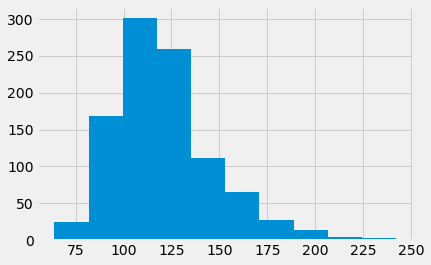

In [16]:
# Answer:
movies.duration.hist(bins = 10)

#### Use a box plot to display that same data.

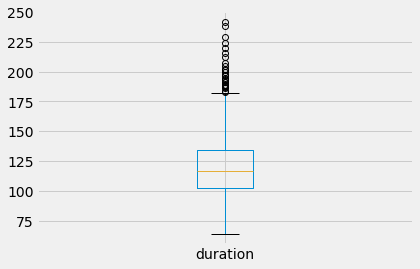

In [17]:
# Answer:
movies.duration.plot(kind='box');

## Intermediate level

#### Count how many movies have each of the content ratings.

In [18]:
# Answer:

# movies.content_rating.describe()

movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

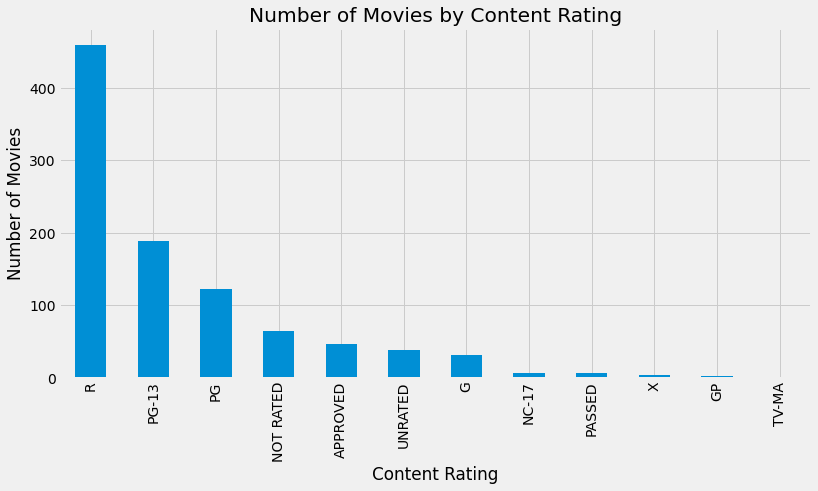

In [23]:
# Answer:

movies.content_rating.value_counts().plot(kind= 'bar', figsize=(12,6));
plt.title('Number of Movies by Content Rating');
plt.xlabel('Content Rating');
plt.ylabel('Number of Movies');


#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [24]:
# Answer:
movies['content_rating'] = movies['content_rating'].replace(['NOT RATED','APPROVED','PASSED','GP'], 'UNRATED')
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [25]:
# Answer:
movies['content_rating'] = movies['content_rating'].replace(['X','TV-MA'], 'NC-17')
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [26]:
# Answer:
print((movies.isnull().sum()))

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64


#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [27]:
# Answer: 
movies[movies.isnull().any(axis=1)]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [28]:
movies.content_rating.fillna(value='UNRATED', inplace=True)

In [29]:
print((movies.isnull().sum()))

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [30]:
# Answer:
long_movies = (movies.duration > 119)
long_movies_avg_star_rating = movies[long_movies].star_rating.mean()

short_movies = (movies.duration < 119)
short_movies_avg_star_rating = movies[short_movies].star_rating.mean()

print('Avg. star rating for movies 2 hours or longer: ' + str(long_movies_avg_star_rating))
print('Avg. star rating for movies less than 2 hours long: ' + str(short_movies_avg_star_rating))

Avg. star rating for movies 2 hours or longer: 7.948898678414082
Avg. star rating for movies less than 2 hours long: 7.835294117647047


#### Use a visualization to detect whether there is a relationship between duration and star rating.

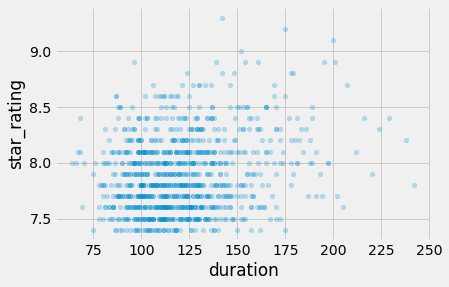

In [31]:
# Answer:
movies[['duration', 'star_rating']].sort_values('duration').values
movies.plot(kind='scatter', x='duration', y='star_rating', alpha= 0.25);

#### Calculate the average duration for each genre.

In [32]:
# Answer:
movies.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

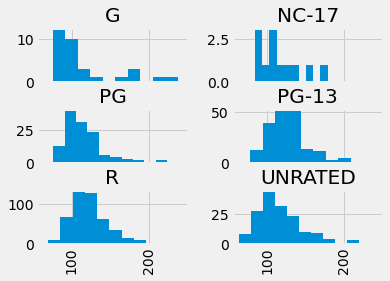

In [38]:
# Answer:
movies[['duration', 'content_rating']].sort_values('duration').values
#movies.plot(kind='scatter', x='duration', y='content_rating', alpha= 0.25);
movies.hist(column='duration', by='content_rating', sharex=True);
#movies.boxplot(column='duration', by='content_rating');


#### Determine the top rated movie (by star rating) for each genre.

In [39]:
# Answer:
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

In [40]:
mask = movies['genre'] == 'Drama'
movies[mask].sort_values('star_rating', ascending=False).head(1)

,star_rating,title,content_rating,genre,duration,actors_list
5,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."


In [41]:
mask = movies['genre'] == 'Comedy'
movies[mask].sort_values('star_rating', ascending=False).head(1)

,star_rating,title,content_rating,genre,duration,actors_list
25,8.6,Life Is Beautiful,PG-13,Comedy,116,"[u'Roberto Benigni', u'Nicoletta Braschi', u'G..."


In [42]:
mask = movies['genre'] == 'Action'
movies[mask].sort_values('star_rating', ascending=False).head(1)

,star_rating,title,content_rating,genre,duration,actors_list
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."


In [43]:
mask = movies['genre'] == 'Crime'
movies[mask].sort_values('star_rating', ascending=False).head(1)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."


In [44]:
mask = movies['genre'] == 'Biography'
movies[mask].sort_values('star_rating', ascending=False).head(1)

,star_rating,title,content_rating,genre,duration,actors_list
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."


In [45]:
mask = movies['genre'] == 'Adventure'
movies[mask].sort_values('star_rating', ascending=False).head(1)

,star_rating,title,content_rating,genre,duration,actors_list
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."


In [46]:
mask = movies['genre'] == 'Animation'
movies[mask].sort_values('star_rating', ascending=False).head(1)

,star_rating,title,content_rating,genre,duration,actors_list
30,8.6,Spirited Away,PG,Animation,125,"[u'Daveigh Chase', u'Suzanne Pleshette', u'Miy..."


In [47]:
mask = movies['genre'] == 'Horror'
movies[mask].sort_values('star_rating', ascending=False).head(1)

,star_rating,title,content_rating,genre,duration,actors_list
39,8.6,Psycho,R,Horror,109,"[u'Anthony Perkins', u'Janet Leigh', u'Vera Mi..."


In [48]:
mask = movies['genre'] == 'Mystery'
movies[mask].sort_values('star_rating', ascending=False).head(1)

,star_rating,title,content_rating,genre,duration,actors_list
38,8.6,Rear Window,UNRATED,Mystery,112,"[u'James Stewart', u'Grace Kelly', u'Wendell C..."


In [49]:
mask = movies['genre'] == 'Western'
movies[mask].sort_values('star_rating', ascending=False).head(1)

,star_rating,title,content_rating,genre,duration,actors_list
6,8.9,"The Good, the Bad and the Ugly",UNRATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."


In [50]:
mask = movies['genre'] == 'Sci-Fi'
movies[mask].sort_values('star_rating', ascending=False).head(1)

,star_rating,title,content_rating,genre,duration,actors_list
145,8.2,Blade Runner,R,Sci-Fi,117,"[u'Harrison Ford', u'Rutger Hauer', u'Sean You..."


In [51]:
mask = movies['genre'] == 'Thriller'
movies[mask].sort_values('star_rating', ascending=False).head(1)

,star_rating,title,content_rating,genre,duration,actors_list
350,8.0,Shadow of a Doubt,UNRATED,Thriller,108,"[u'Teresa Wright', u'Joseph Cotten', u'Macdona..."


In [52]:
mask = movies['genre'] == 'Film-Noir'
movies[mask].sort_values('star_rating', ascending=False).head(1)

,star_rating,title,content_rating,genre,duration,actors_list
105,8.3,The Third Man,UNRATED,Film-Noir,93,"[u'Orson Welles', u'Joseph Cotten', u'Alida Va..."


In [53]:
mask = movies['genre'] == 'Family'
movies[mask].sort_values('star_rating', ascending=False).head(1)

,star_rating,title,content_rating,genre,duration,actors_list
468,7.9,E.T. the Extra-Terrestrial,PG,Family,115,"[u'Henry Thomas', u'Drew Barrymore', u'Peter C..."


In [54]:
mask = movies['genre'] == 'Fantasy'
movies[mask].sort_values('star_rating', ascending=False).head(1)

,star_rating,title,content_rating,genre,duration,actors_list
638,7.7,The City of Lost Children,R,Fantasy,112,"[u'Ron Perlman', u'Daniel Emilfork', u'Judith ..."


In [55]:
mask = movies['genre'] == 'History'
movies[mask].sort_values('star_rating', ascending=False).head(1)

,star_rating,title,content_rating,genre,duration,actors_list
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."


In [56]:
# Figuring out how to list them all at once
movies.sort_values('star_rating', ascending=False).groupby('genre').title.first()

genre
Action                                     The Dark Knight
Adventure    The Lord of the Rings: The Return of the King
Animation                                    Spirited Away
Biography                                 Schindler's List
Comedy                                        Modern Times
Crime                             The Shawshank Redemption
Drama                                         12 Angry Men
Family                          E.T. the Extra-Terrestrial
Fantasy                          The City of Lost Children
Film-Noir                                    The Third Man
History                                Battleship Potemkin
Horror                                              Psycho
Mystery                                        Rear Window
Sci-Fi                                        Blade Runner
Thriller                                 Shadow of a Doubt
Western                     The Good, the Bad and the Ugly
Name: title, dtype: object

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [57]:
# Answer:
movies.title.is_unique

False

In [58]:
movies.title.duplicated().sum()

4

In [59]:
movies.title.loc[movies.title.duplicated()]

482    The Girl with the Dragon Tattoo
905                            Dracula
924                     Les Miserables
936                          True Grit
Name: title, dtype: object

In [60]:
mask = movies['title'] == 'The Girl with the Dragon Tattoo'
movies[mask]

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."


In [61]:
mask = movies['title'] == 'Dracula'
movies[mask]

,star_rating,title,content_rating,genre,duration,actors_list
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."


In [62]:
mask = movies['title'] == 'Les Miserables'
movies[mask]

,star_rating,title,content_rating,genre,duration,actors_list
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."


In [63]:
mask = movies['title'] == 'True Grit'
movies[mask]

,star_rating,title,content_rating,genre,duration,actors_list
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [64]:
# These movies are not duplicates, they are different makes of the same story with different casts
# Having 'year released' data would be interesting with this though!

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [65]:
# Answer:
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

In [66]:
populated_genres = ['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery']
movies[movies.genre.isin(populated_genres)].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [67]:
# Answer:
movie_genre_counts = movies.genre.value_counts()
populated_genres = movie_genre_counts[movie_genre_counts >= 10].index
movies[movies.genre.isin(populated_genres)].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [213]:
# Answer:
movies.groupby('genre').star_rating.mean()[movies.genre.value_counts() >= 10]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [214]:
# Answer:
genre_rating = movies.groupby('genre').star_rating.agg(['count', 'mean'])
genre_rating[genre_rating['count'] >= 10]

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!

In [171]:
# Who was in the most movies
movies.actors_list.value_counts()

[u'Daniel Radcliffe', u'Emma Watson', u'Rupert Grint']        6
[u'Mark Hamill', u'Harrison Ford', u'Carrie Fisher']          3
[u'Tom Hanks', u'Tim Allen', u'Joan Cusack']                  2
[u'Michael J. Fox', u'Christopher Lloyd', u'Lea Thompson']    2
[u'Ian McKellen', u'Martin Freeman', u'Richard Armitage']     2
                                                             ..
[u'Ranbir Kapoor', u'Priyanka Chopra', u'Ileana']             1
[u'Kang-ho Song', u'Ha-kyun Shin', u'Doona Bae']              1
[u'John Getz', u'Frances McDormand', u'Dan Hedaya']           1
[u'Bruce Lee', u'John Saxon', u'Jim Kelly']                   1
[u'Katharine Hepburn', u'Cary Grant', u'Charles Ruggles']     1
Name: actors_list, Length: 969, dtype: int64

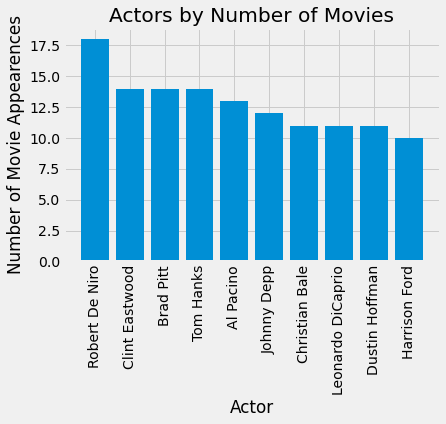

In [113]:
#Creating a function to clean the data
def clean_data(string):
    return string.replace("[","").replace("]","").replace("u'","").replace("',",",")[:-1]

#Applying that function to all the data under 'actors_list'
movies_count = movies['actors_list'].apply(clean_data)

#New list to store individual actor names
new_actors_list = []

#For loop to go through all 'actors_list' and add each name to the list, expperated by a comma
for movie_actors in movies_count:
    new_actors_list.append([e.strip() for e in movie_actors.split(',')])

#Creating a dictionary to sort thorugh new list and tally up how many times an actor appears in 'new_actors list' and storing the name with the number, indicating how many moovies the actor has been in (relative to this data set)
actors_dict = {}
for actor in new_actors_list:
    for a in actor:
        if a in actors_dict:
            actors_dict[a] +=1
        else:
            actors_dict[a] = 1

#Sorting new dictionary by number of movies
sorted_actors = sorted(actors_dict.items(), key=lambda x: x[1], reverse=True)
sorted_actors

#Getting the top 10 actors
popular_actors = sorted_actors[:10]

#Plotting actors by number of movies they've been in relative to this data set
x, y = zip(*popular_actors)
plt.bar(x, y)
plt.xticks(rotation=90)
plt.title('Actors by Number of Movies');
plt.xlabel('Actor');
plt.ylabel('Number of Movie Appearences');
plt.show()

In [110]:
# How do I join this back to the original data set?
# Create a new data frame with actors